# Exercise

Find the original problem description in kaggle here. https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 

SalePrice is the outcome variable. 
Use a clean version of the data that is treated for null values. https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv
    

- Find number of categorical and continuous variables
- Some observations contain null values in SalesPrice. Drop those records from the analysis 
- Divide the data into training and test data 70/30 ratio with seed =1
- Build a model to estimate SalePrice excluding Id as feature. Calculate R2 and RMSE - Linear regression, Lasso, Ridge, Elastic net
- Take log of the sales price, does the R2 score improves?
- Try model with polynomial terms with degree = 2
- Try PCA - what is required number of principal components to retain 99% of variance?
- Try Feature selection - find 10 most significant features of the dataset. 




In [2]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'0.23.4'

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [8]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [12]:
num_features = [k for k in dict(df.dtypes) if df.dtypes[k] in ["float64", "int64"]]
cat_features = [k for k in dict(df.dtypes) if df.dtypes[k] not in ["float64", "int64"]]

In [13]:
len(num_features), len(cat_features)

(38, 42)

In [14]:
del df["Id"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

rmse_training:  0.08606817747710854
rmse_test 76190488351.17424
r2_training:  0.9494518297088844
r2_test -3.0715943247509893e+22


Text(0.5, 1.0, 'Residual plot')

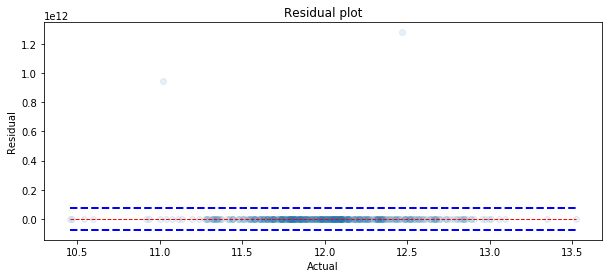

In [20]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

rmse_training:  0.1215074491019328
rmse_test 0.16043678540571768
r2_training:  0.8992544125885743
r2_test 0.8638021520732089


Text(0.5, 1.0, 'Residual plot')

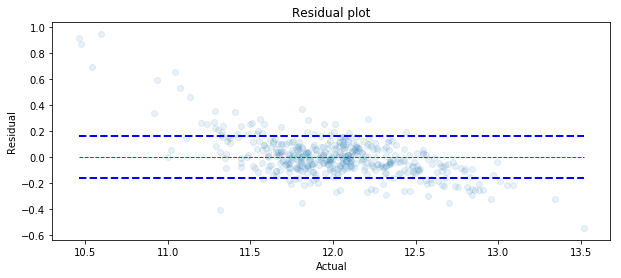

In [23]:
target = "SalesPrice"
X = df.drop(columns=target)

#y = df[target]
y = np.log(df[target])

X_dummy = pd.get_dummies(X, drop_first=True)
features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(learning_rate = "invscaling"
                                      , max_iter = 2000,alpha = 1.0))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

rmse_training = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

r2_training = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("rmse_training: ", rmse_training)
print("rmse_test", rmse_test)
print("r2_training: ", r2_training)
print("r2_test", r2_test)

residuals_test = y_test_pred - y_test

plt.figure(figsize=(10, 4))
plt.scatter(y_test, residuals_test, alpha = 0.1)
plt.hlines(0, np.min(y_test), np.max(y_test), linestyle = "--", color = "red", linewidth = 1)
residual_std = np.std(residuals_test)
plt.hlines([residual_std, -residual_std], np.min(y_test), np.max(y_test)
                   , linestyle = "--", color = "blue", linewidth = 2)


plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")